#📌 Extracão

In [106]:
import pandas as pd

In [107]:
dados = pd.read_json('/content/TelecomX_Data.json')
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [108]:
customer = pd.json_normalize(dados['customer'])

In [109]:
phone = pd.json_normalize(dados['phone'])

In [110]:
internet = pd.json_normalize(dados['internet'])

In [111]:
account = pd.json_normalize(dados['account'])

In [112]:
df = pd.concat([dados['customerID'], dados['Churn'], customer, phone, internet, account], axis=1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [114]:
import numpy as np

In [115]:
for i in list(df.columns):
    print(f'{i}{df[i].unique()}')

customerID['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn['No' 'Yes' '']
gender['Female' 'Male']
SeniorCitizen[0 1]
Partner['Yes' 'No']
Dependents['Yes' 'No']
tenure[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService['Yes' 'No']
MultipleLines['No' 'Yes' 'No phone service']
InternetService['DSL' 'Fiber optic' 'No']
OnlineSecurity['No' 'Yes' 'No internet service']
OnlineBackup['Yes' 'No' 'No internet service']
DeviceProtection['No' 'Yes' 'No internet service']
TechSupport['Yes' 'No' 'No internet service']
StreamingTV['Yes' 'No' 'No internet service']
StreamingMovies['No' 'Yes' 'No internet service']
Contract['One year' 'Month-to-month' 'Two year']
PaperlessBilling['Yes' 'No']
PaymentMethod['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer

In [116]:
for i in list(df.columns):
    print(df.isna().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
customerID          0
Churn               0
gender

In [117]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [118]:
df = df[df.Churn != '']

In [119]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [120]:
df['Charges.Total'] = df['Charges.Total'].apply(pd.to_numeric, errors='coerce')

<ipython-input-120-3610603425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charges.Total'] = df['Charges.Total'].apply(pd.to_numeric, errors='coerce')


In [121]:
df.rename(columns={'Charges.Total': 'ChargesTotal'}, inplace=True)
df.rename(columns={'Charges.Monthly': 'ChargesMonthly'}, inplace=True)

<ipython-input-121-569716885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Charges.Total': 'ChargesTotal'}, inplace=True)
<ipython-input-121-569716885>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Charges.Monthly': 'ChargesMonthly'}, inplace=True)


In [122]:
df.ChargesTotal.isna().sum()

np.int64(11)

In [123]:
df.ChargesTotal.fillna(0, inplace = True)

<ipython-input-123-56697953>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.ChargesTotal.fillna(0, inplace = True)
<ipython-input-123-56697953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ChargesTotal.fillna(0, inplace = True)


In [124]:
df.ChargesTotal.isna().sum()

np.int64(0)

In [125]:
df['ChargesTotal'] = df['ChargesTotal'].astype(np.float64)

<ipython-input-125-2870593369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChargesTotal'] = df['ChargesTotal'].astype(np.float64)


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [127]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [128]:
df['Churn'] = df['Churn'].str.lower()
df['gender'] = df['gender'].str.lower()
df['Partner'] = df['Partner'].str.lower()
df['Dependents'] = df['Dependents'].str.lower()
df['PhoneService'] = df['PhoneService'].str.lower()
df['MultipleLines'] = df['MultipleLines'].str.lower()
df['InternetService'] = df['InternetService'].str.lower()
df['OnlineSecurity'] = df['OnlineSecurity'].str.lower()
df['OnlineBackup'] = df['OnlineBackup'].str.lower()
df['DeviceProtection'] = df['DeviceProtection'].str.lower()
df['TechSupport'] = df['TechSupport'].str.lower()
df['StreamingTV'] = df['StreamingTV'].str.lower()
df['StreamingMovies'] = df['StreamingMovies'].str.lower()
df['Contract'] = df['Contract'].str.lower()
df['PaperlessBilling'] = df['PaperlessBilling'].str.lower()
df['PaymentMethod'] = df['PaymentMethod'].str.lower()


In [129]:
df['ChargesDaily'] = (df['ChargesMonthly'] / 30).round(2)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDaily
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


#📊 Carga e análise

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
percentual_churn = (df['Churn'].value_counts(normalize=True)['yes']) * 100
percentual_churn

np.float64(26.536987079369588)

In [132]:
num_churn = (df['Churn'] == 'yes').sum()
num_churn

np.int64(1869)

In [133]:
total_registros = len(df)
total_registros

7043

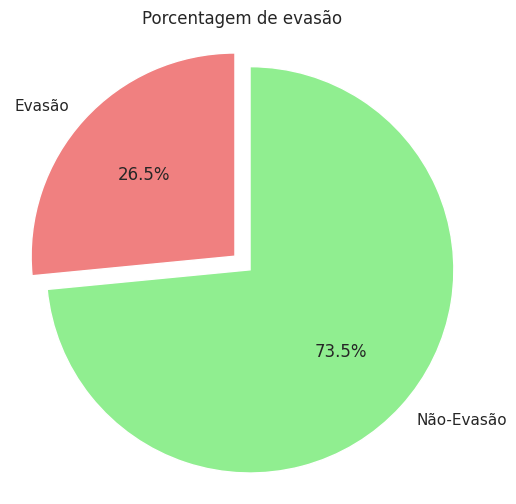

In [134]:
fig, ax = plt.subplots(figsize=(6,6))
labels = ['Evasão', 'Não-Evasão']
sizes = [num_churn, (total_registros - num_churn)]
colors = ['lightcoral', 'lightgreen']
ax.set_title('Porcentagem de evasão')
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
ax.axis('equal')

plt.show()

In [135]:
lista_analise = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

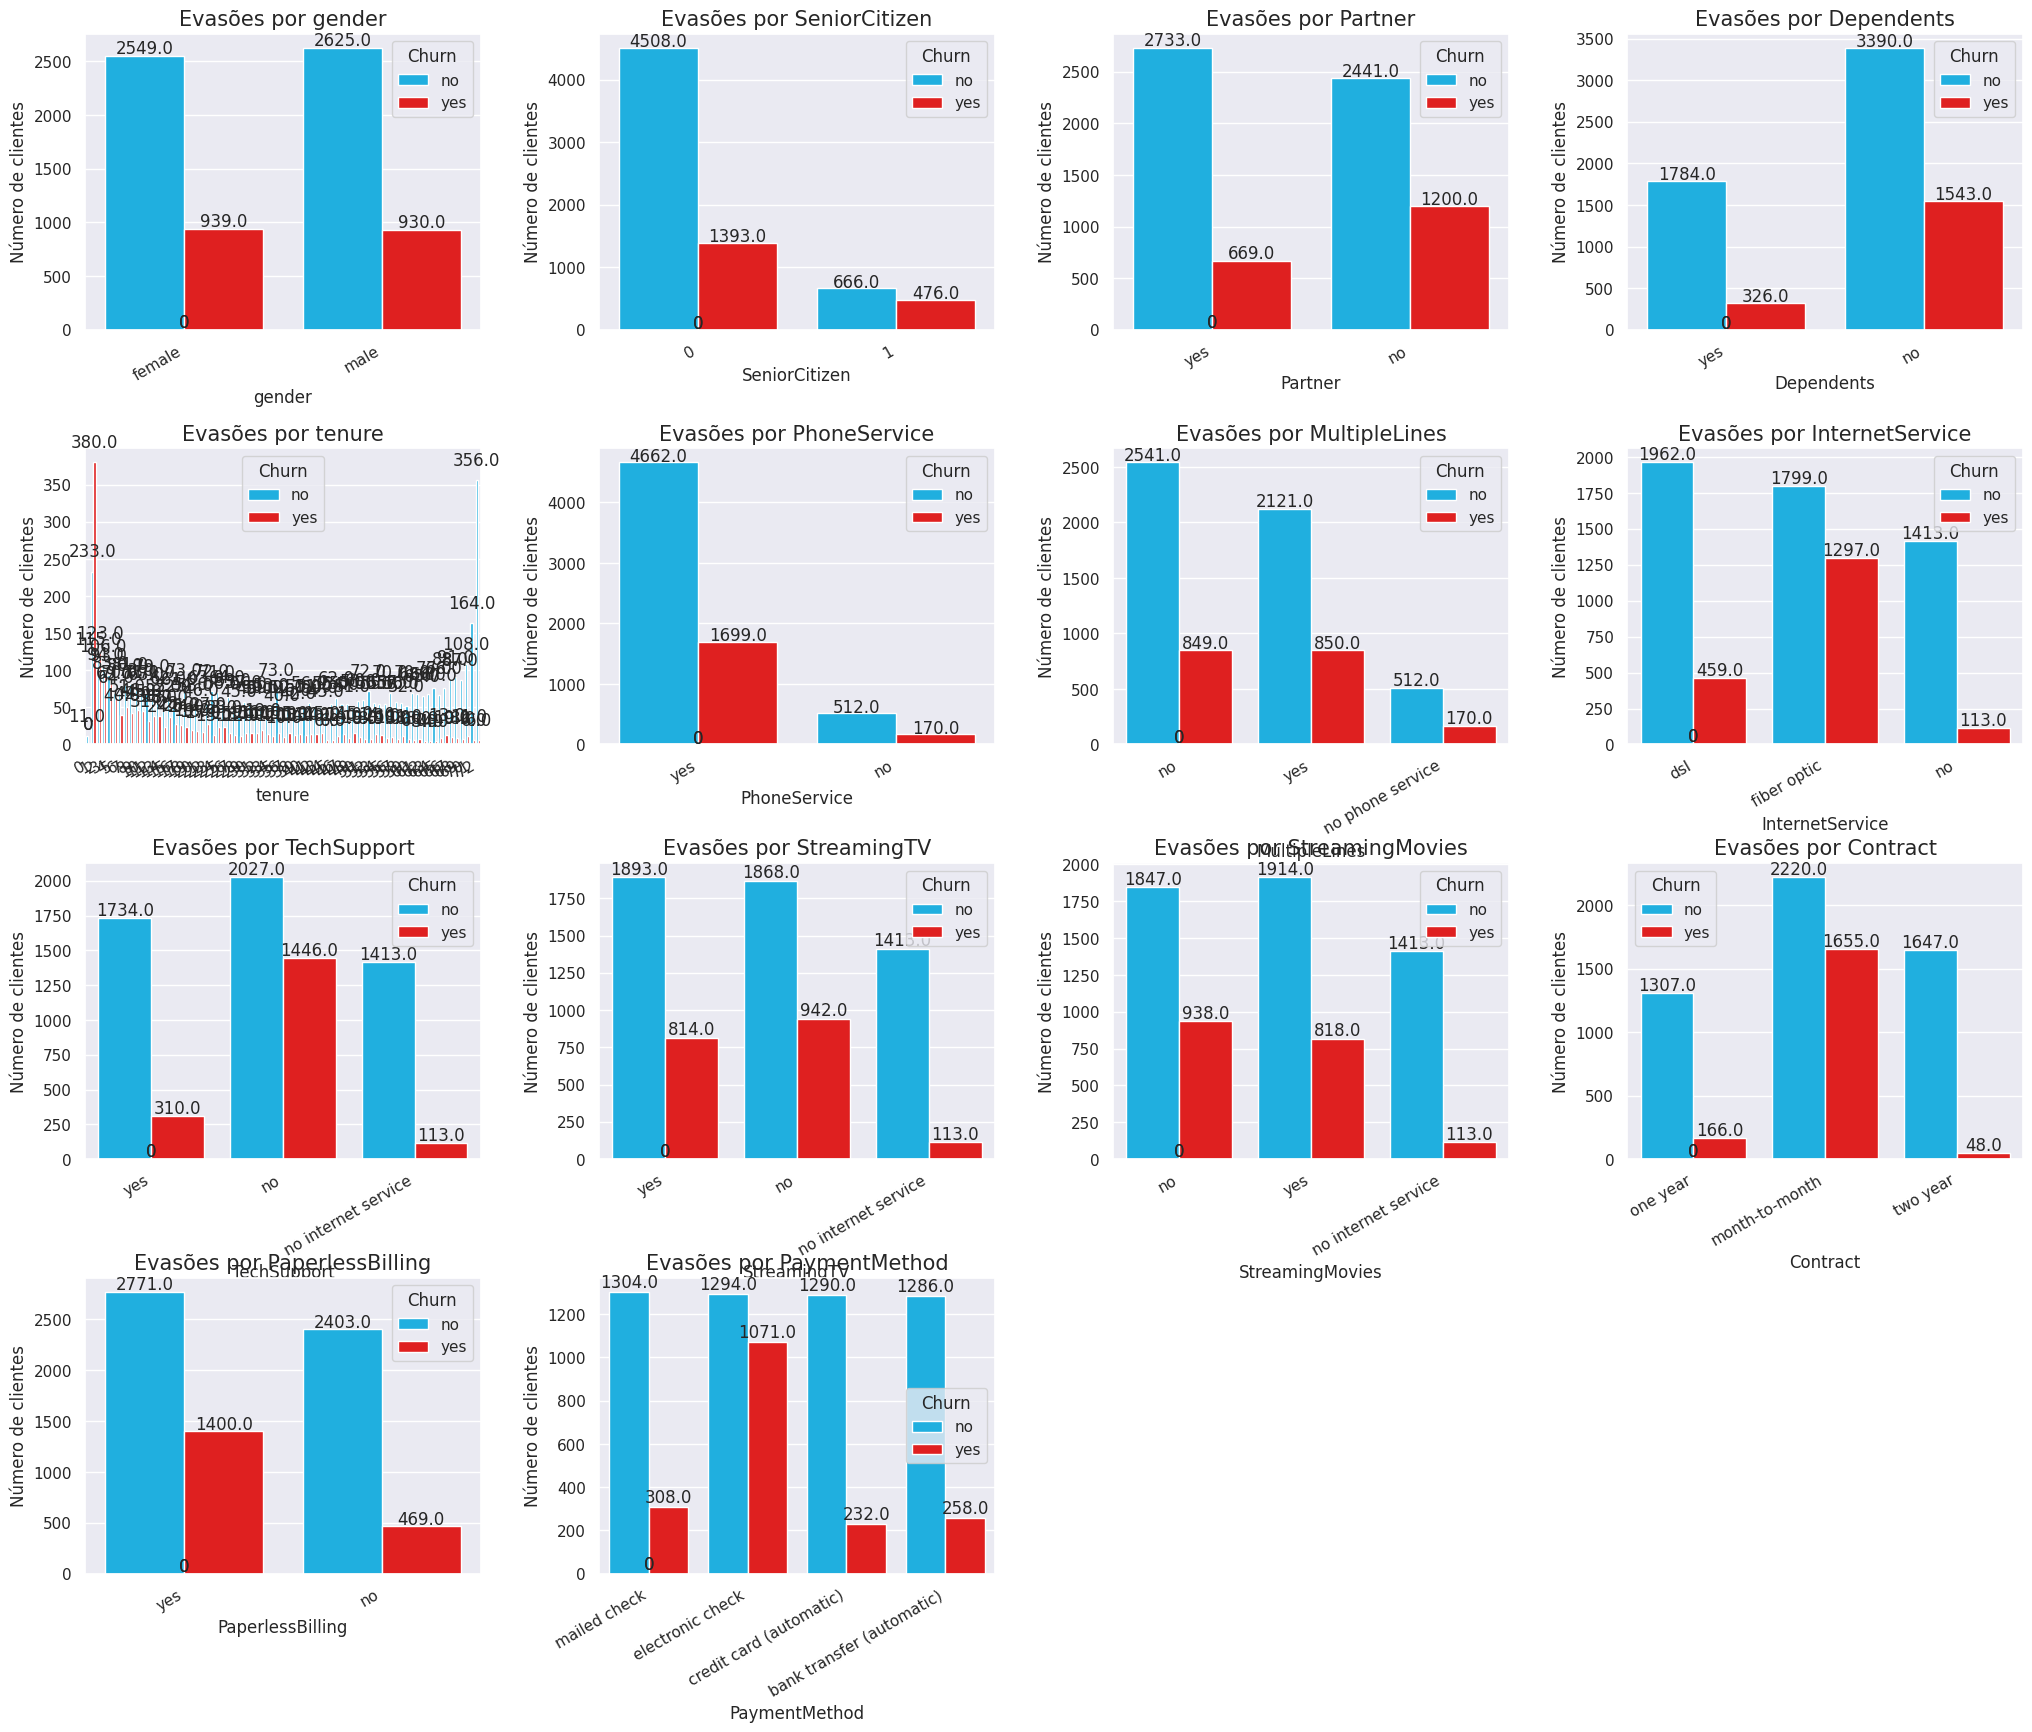

In [136]:
n = list(enumerate(lista_analise))

sns.set(rc = {'figure.figsize':(25,20)})

for i in n:

    plt.subplot(4, 4,  i[0]+1)
    ax = sns.countplot(data = df,
                    x = i[1],
                    hue = 'Churn',
                    palette = {'deepskyblue', 'red'},
                    )
    plt.xticks(rotation=30, ha='right')
    ax.set_title(f'Evasões por {i[1]}', fontsize = 15)
    ax.set_ylabel('Número de clientes', fontsize = 12)
    ax.set_xlabel(i[1], fontsize = 12)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 12)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

#📄Relatorio Final

In [137]:
# Introdução: Esta análise de dados tem como objetivo principal entender os possíveis motivos da evasão dos clientes da TelecomX.
# A empresa enfrenta um alto índice de cancelamentos e, para lidar com esse desafio, é essencial identificar padrões de comportamento,
# perfis de clientes com maior propensão ao churn e os principais fatores que influenciam na decisão de cancelamento.


In [138]:
# Limpeza e Tratamento de Dados: Após a importação do conjunto de dados da Telecom X pelo arquivo Json, tive que normalizar as colunas,
# já que algumas estavam em formato de dicionário, através do método normalize do pandas.
# Com o dataframe normalizado em mãos, usei o método unique para verificar como os registros estavam feitos, e se havia algo fora do padrão.
# Verifiquei que em alguns registros o Churn estava em branco, então retirei esses registros do dataframe já que o Churn é justamente o que
# estamos analisando. Após, verifiquei em cada coluna a presença de registros nulos, e os tratei.
# Após verificar as informações do dataframe pelo método info, percebi que a coluna de gastos totais estava como 'object', e não como float,
# então fiz os ajustes necessários.



In [139]:
# Análise Exploratória de Dados: Com os dados devidamente tratados, iniciamos a fase de Análise Exploratória de Dados,
# com o objetivo de identificar padrões, tendências e possíveis correlações entre as variáveis que possam estar relacionadas a evasão de clientes.
# Foi realizada uma análise da distribuição dos clientes que permaneceram e os que cancelaram o serviço.
# Identifiquei que aproximadamente 26.5% dos clientes analisados realizaram o cancelamento, evidenciando o desafio que a Telecom X enfrenta com a retenção.
# A seguir, foi feita uma análise individual de cada uma das principais variáveis categóricas, comparando seus diferentes valores com a taxa de evasão.
# Foram utilizados gráficos de barras horizontais, com a variável de análise no eixo y e o número de clientes no eixo x, segmentados pela variável Churn.

In [141]:
# Conclusões e Insights:
#Tempo de Contrato:
# Clientes com contratos do tipo mensal apresentaram uma taxa de evasão significativamente maior do que aqueles com contratos de prazo mais longo,
# como anual ou bianual. Isso indica que clientes com vínculo curto tendem a ser menos fidelizados.

# Serviços de Internet:
# Usuários com Internet via Fibra Óptica demonstraram maior propensão ao cancelamento quando comparados aos clientes que usam DSL ou que não possuem serviço de internet.

# Suporte Técnico e Serviços Adicionais:
# Clientes que não possuem suporte técnico e não utilizam serviços de streaming tiveram uma taxa de evasão mais alta.
# Isso pode indicar que a falta de benefícios adicionais e suporte adequado influencia na decisão de cancelamento.

#Fatura Digital:
#Clientes que optaram por fatura digital também apresentaram uma taxa de evasão mais elevada.

#Tempo de Permanência:
# Foi observado que clientes com menos tempo de casa têm uma maior chance de evasão, o que sugere que os primeiros meses de serviço são críticos para a fidelização.

# Faturamento Mensal:
# Clientes com faturamento mensal mais alto também mostraram uma taxa de evasão superior, o que pode indicar uma percepção de custo elevado em relação ao valor percebido do serviço.

In [142]:
# Recomendações:
# Incentivar contratos de longo prazo
# Fortalecer o suporte técnico
# Monitoramento de clientes com baixo tempo de permanência
# Reavaliar estratégias de precificação
# Melhorar a comunicação com clientes que optaram por fatura digital
# Desenvolver um modelo preditivo de evasão